
Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




     Store         StoreType          Assortment        CompetitionDistance
 Min.   :   1.0   Length:1115        Length:1115        Min.   :   20.0    
 1st Qu.: 279.5   Class :character   Class :character   1st Qu.:  717.5    
 Median : 558.0   Mode  :character   Mode  :character   Median : 2325.0    
 Mean   : 558.0                                         Mean   : 5404.9    
 3rd Qu.: 836.5                                         3rd Qu.: 6882.5    
 Max.   :1115.0                                         Max.   :75860.0    
                                                        NA's   :3          
 CompetitionOpenSinceMonth CompetitionOpenSinceYear     Promo2      
 Min.   : 1.000            Min.   :1900             Min.   :0.0000  
 1st Qu.: 4.000            1st Qu.:2006             1st Qu.:0.0000  
 Median : 8.000            Median :2010             Median :1.0000  
 Mean   : 7.225            Mean   :2009             Mean   :0.5121  
 3rd Qu.:10.000            3rd Qu.:2013        

Store                 StoreType                Assortment 
                        0                         0                         0 
      CompetitionDistance CompetitionOpenSinceMonth  CompetitionOpenSinceYear 
                        3                       354                       354 
                   Promo2           Promo2SinceWeek           Promo2SinceYear 
                        0                       544                       544 
            PromoInterval 
                        0

Warning message:
“Removed 3 rows containing non-finite outside the scale range (`stat_bin()`).”


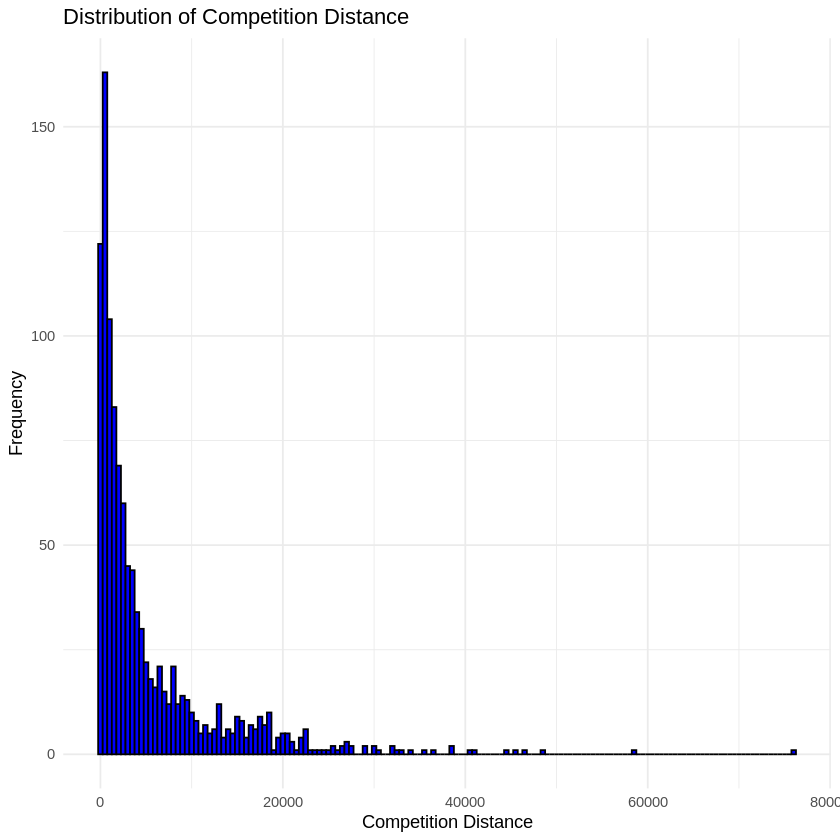

[1] -0.1095036


Call:
lm(formula = CompetitionDistance ~ Promo2 + Promo2SinceYear, 
    data = data)

Residuals:
   Min     1Q Median     3Q    Max 
 -5193  -3550  -2088   1437  22957 

Coefficients: (1 not defined because of singularities)
                Estimate Std. Error t value Pr(>|t|)   
(Intercept)     708322.2   268135.3   2.642  0.00848 **
Promo2                NA         NA      NA       NA   
Promo2SinceYear   -349.9      133.3  -2.626  0.00888 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5327 on 568 degrees of freedom
  (545 observations deleted due to missingness)
Multiple R-squared:  0.01199,	Adjusted R-squared:  0.01025 
F-statistic: 6.894 on 1 and 568 DF,  p-value: 0.008884


`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 545 rows containing non-finite outside the scale range
(`stat_smooth()`).”
Warning message:
“Removed 545 rows containing missing values or values outside the scale range
(`geom_point()`).”


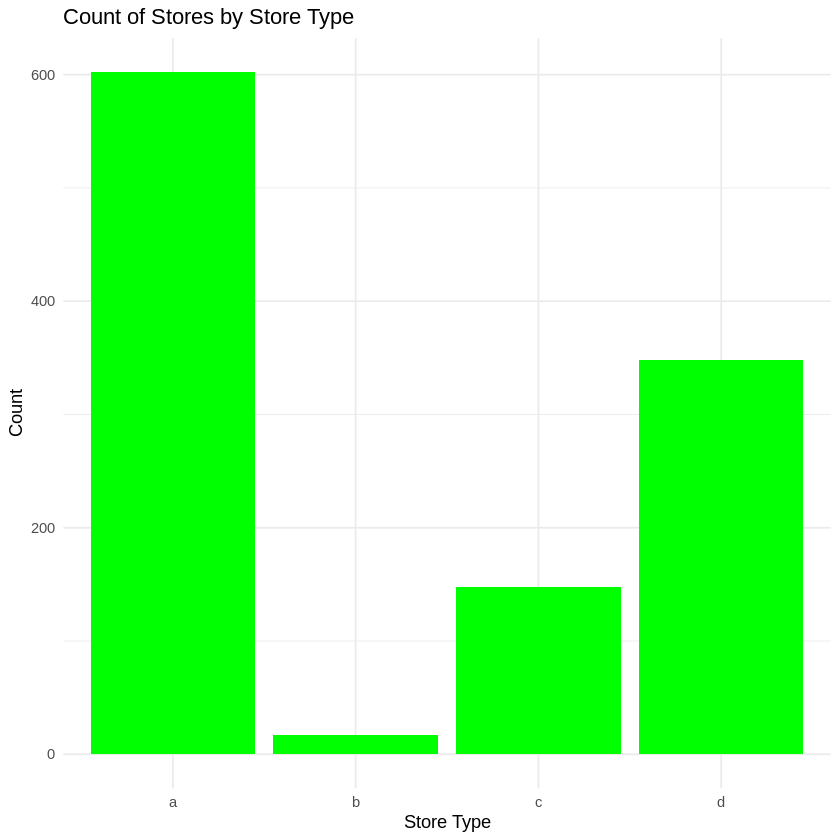

Warning message:
“Removed 3 rows containing non-finite outside the scale range
(`stat_boxplot()`).”


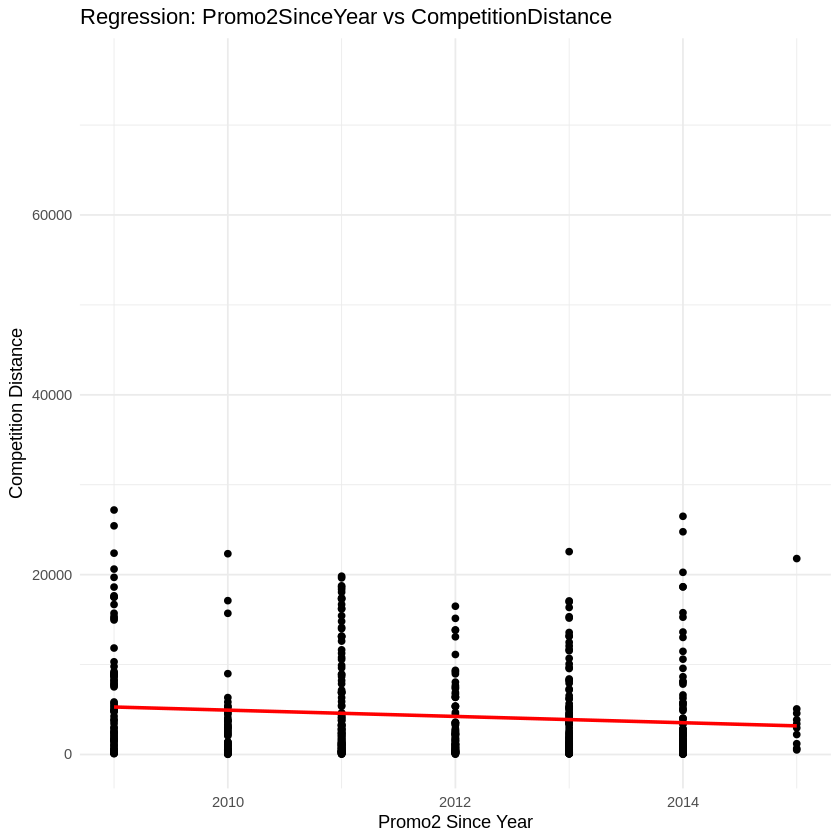

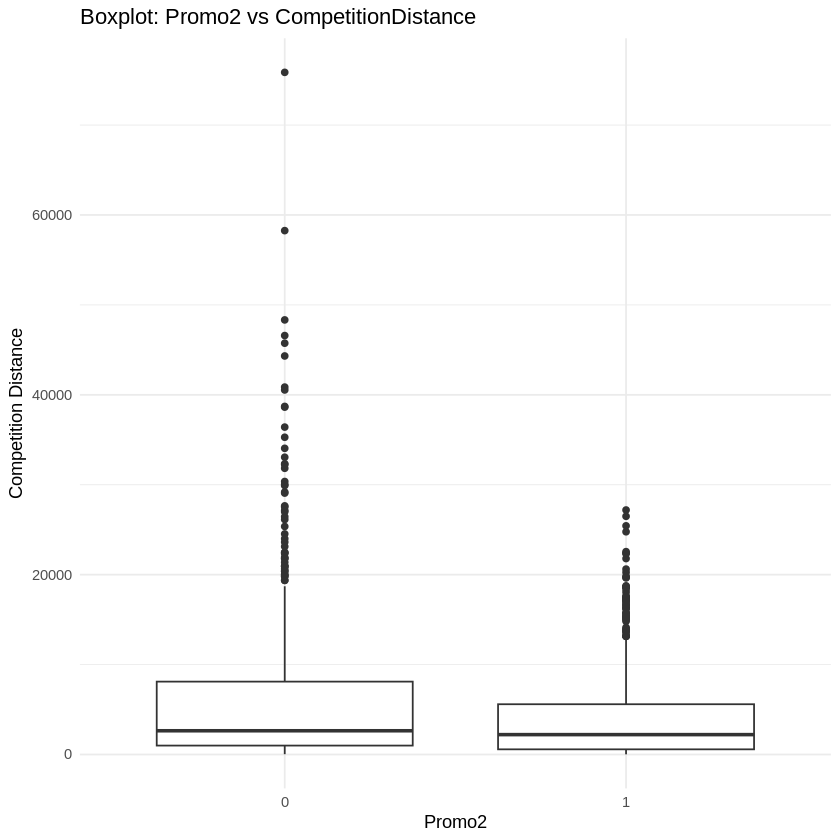

In [1]:
# Load necessary libraries
library(ggplot2)
library(dplyr)

# Load the dataset
data <- read.csv("/content/store.csv")

# 1. EDA: Summary of dataset
summary(data)

# 2. EDA: Missing value analysis
colSums(is.na(data))

# 3. EDA: Distribution of 'CompetitionDistance'
ggplot(data, aes(x = CompetitionDistance)) +
  geom_histogram(binwidth = 500, fill = "blue", color = "black") +
  theme_minimal() +
  labs(title = "Distribution of Competition Distance", x = "Competition Distance", y = "Frequency")

# 4. EDA: Count of stores by StoreType
ggplot(data, aes(x = StoreType)) +
  geom_bar(fill = "green") +
  theme_minimal() +
  labs(title = "Count of Stores by Store Type", x = "Store Type", y = "Count")

# 5. EDA: Correlation between CompetitionDistance and Promo2SinceYear
cor(data$CompetitionDistance, data$Promo2SinceYear, use="complete.obs")

# Linear Regression: Predicting 'CompetitionDistance' based on 'Promo2' and 'Promo2SinceYear'
model <- lm(CompetitionDistance ~ Promo2 + Promo2SinceYear, data = data)
summary(model)

# Regression Graph: Scatter plot with regression line for 'Promo2SinceYear' vs 'CompetitionDistance'
ggplot(data, aes(x = Promo2SinceYear, y = CompetitionDistance)) +
  geom_point() +
  geom_smooth(method = "lm", se = FALSE, color = "red") +
  theme_minimal() +
  labs(title = "Regression: Promo2SinceYear vs CompetitionDistance", x = "Promo2 Since Year", y = "Competition Distance")

# Regression Graph: Boxplot for 'Promo2' vs 'CompetitionDistance'
ggplot(data, aes(x = as.factor(Promo2), y = CompetitionDistance)) +
  geom_boxplot() +
  theme_minimal() +
  labs(title = "Boxplot: Promo2 vs CompetitionDistance", x = "Promo2", y = "Competition Distance")



Call:
lm(formula = CompetitionDistance ~ Promo2 + Promo2SinceYear, 
    data = data_clean)

Residuals:
   Min     1Q Median     3Q    Max 
 -5193  -3550  -2088   1437  22957 

Coefficients: (1 not defined because of singularities)
                Estimate Std. Error t value Pr(>|t|)   
(Intercept)     708322.2   268135.3   2.642  0.00848 **
Promo2                NA         NA      NA       NA   
Promo2SinceYear   -349.9      133.3  -2.626  0.00888 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5327 on 568 degrees of freedom
Multiple R-squared:  0.01199,	Adjusted R-squared:  0.01025 
F-statistic: 6.894 on 1 and 568 DF,  p-value: 0.008884


`geom_smooth()` using formula = 'y ~ x'


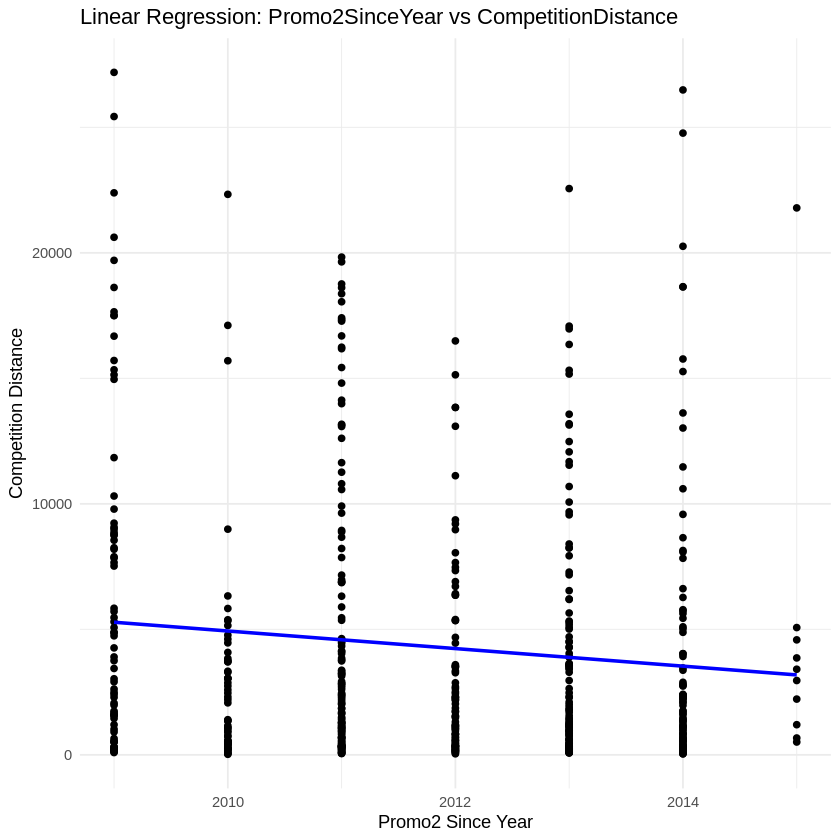

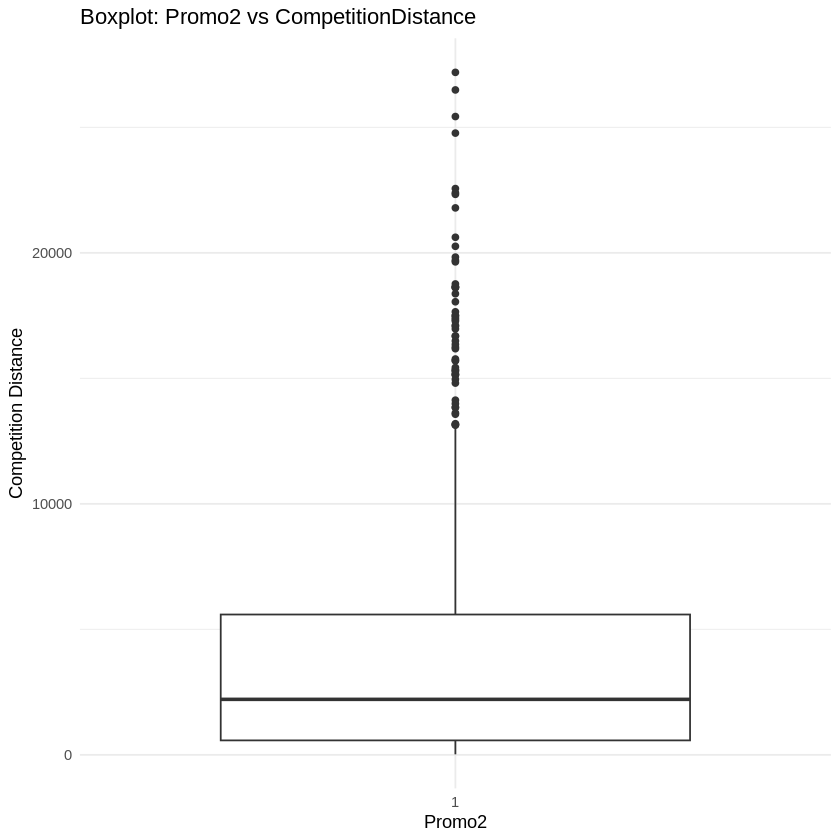

In [2]:
# Load necessary libraries
library(ggplot2)

# Load the dataset
data <- read.csv("/content/store.csv")

# Handle missing values (optional, depending on your strategy)
# For simplicity, let's remove rows with missing values for the regression
data_clean <- na.omit(data[, c("CompetitionDistance", "Promo2", "Promo2SinceYear")])

# Linear Regression: Predicting 'CompetitionDistance' based on 'Promo2' and 'Promo2SinceYear'
model <- lm(CompetitionDistance ~ Promo2 + Promo2SinceYear, data = data_clean)

# Print summary of the model
summary(model)

# Visualization 1: Scatter plot with regression line for 'Promo2SinceYear' vs 'CompetitionDistance'
ggplot(data_clean, aes(x = Promo2SinceYear, y = CompetitionDistance)) +
  geom_point() +
  geom_smooth(method = "lm", se = FALSE, color = "blue") +
  theme_minimal() +
  labs(title = "Linear Regression: Promo2SinceYear vs CompetitionDistance",
       x = "Promo2 Since Year", y = "Competition Distance")

# Visualization 2: Boxplot for 'Promo2' vs 'CompetitionDistance'
ggplot(data_clean, aes(x = as.factor(Promo2), y = CompetitionDistance)) +
  geom_boxplot() +
  theme_minimal() +
  labs(title = "Boxplot: Promo2 vs CompetitionDistance", x = "Promo2", y = "Competition Distance")


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



[1] "R-squared:  0.0119910468649975"
[1] "RMSE:  5317.9163188181"


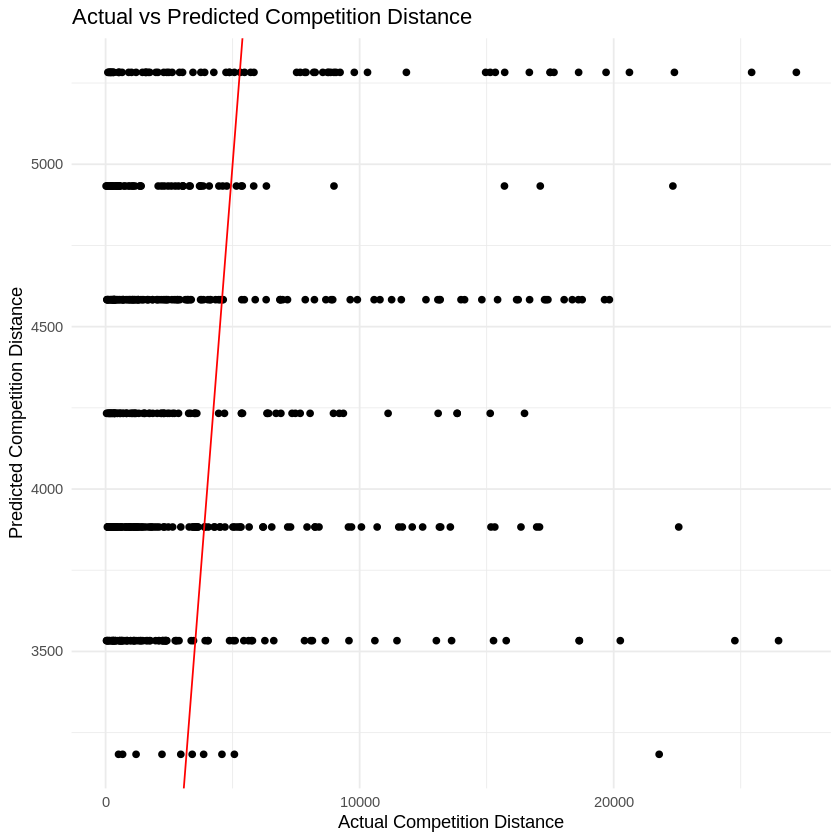

In [4]:
# Load necessary libraries
library(ggplot2)
install.packages("Metrics")
library(Metrics)  # for calculating RMSE

# Load the dataset
data <- read.csv("/content/store.csv")

# Handle missing values: Remove rows with missing values in the relevant columns
data_clean <- na.omit(data[, c("CompetitionDistance", "Promo2", "Promo2SinceYear")])

# Linear Regression: Predicting 'CompetitionDistance' based on 'Promo2' and 'Promo2SinceYear'
model <- lm(CompetitionDistance ~ Promo2 + Promo2SinceYear, data = data_clean)

# R-squared value
r_squared <- summary(model)$r.squared
print(paste("R-squared: ", r_squared))

# Predicting 'CompetitionDistance' for RMSE calculation
predicted_values <- predict(model, data_clean)

# Calculating RMSE
rmse_value <- rmse(data_clean$CompetitionDistance, predicted_values)
print(paste("RMSE: ", rmse_value))

# Alternatively, use this plot to visualize actual vs predicted values
ggplot(data_clean, aes(x = CompetitionDistance, y = predicted_values)) +
  geom_point() +
  geom_abline(slope = 1, intercept = 0, color = "red") +
  theme_minimal() +
  labs(title = "Actual vs Predicted Competition Distance",
       x = "Actual Competition Distance",
       y = "Predicted Competition Distance")
